In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [201]:
df = pd.read_csv("housing.csv")

/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

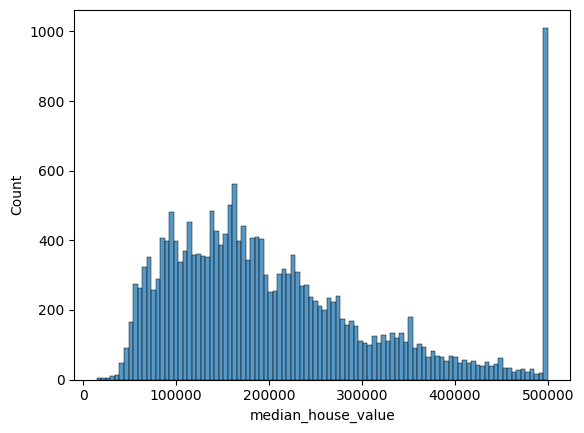

In [202]:
sns.histplot(df.median_house_value, bins=100)

In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [204]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [205]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [206]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [207]:
df.population.median()

1195.0

In [208]:
df["median_value_log"] = np.log1p(df.median_house_value)

/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_value_log', ylabel='Count'>

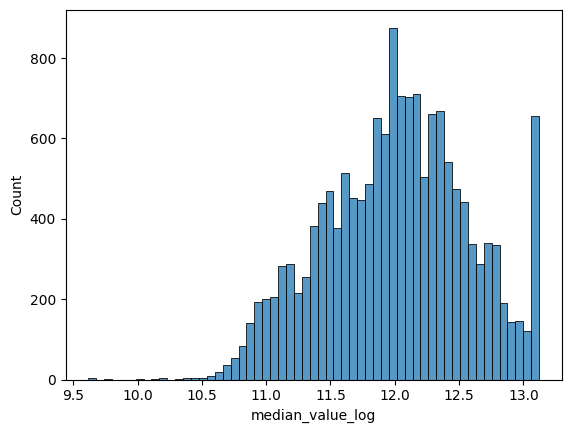

In [209]:
sns.histplot(df.median_value_log)

In [245]:
train_pct = .6
test_pct = .2
val_pct = .2


In [213]:
random_vals = np.arange(len(df))
test_len = int(np.round(len(random_vals)*test_pct))
val_len = int(np.round(len(random_vals)*val_pct))
np.random.seed(42)
np.random.shuffle(random_vals)
test_rows = random_vals[0:test_len]
val_rows = random_vals[test_len:test_len+val_len]
train_rows = random_vals[test_len+val_len:]
test_df = df.iloc[test_rows]
val_df = df.iloc[val_rows]
train_df = df.iloc[train_rows]
test_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)
y_train = train_df["median_value_log"]
X_train = train_df.drop(columns=["median_value_log", "median_house_value"])
y_val = val_df["median_value_log"]
X_val = val_df.drop(columns=["median_value_log", "median_house_value"])
y_test = test_df["median_value_log"]
X_test = test_df.drop(columns=["median_value_log", "median_house_value"])


In [247]:
len(train_rows) + len(val_rows) + len(test_rows)

15687

In [227]:
def prep_X_0(X): 
    return X.total_bedrooms.fillna(0, inplace=True)

def prep_X_m(X):
    return X.total_bedrooms.fillna(X.total_bedrooms.mean() , inplace=True)

In [228]:
prep_X_0(X_train)
X_train.isnull().sum()

index                 0
latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [241]:
def linear_reg(X, y, reg=0.0):
    #add ones
    one_arr = np.ones(X.shape[0]).tolist()
    X['bias'] = one_arr
    #print (X.shape)
    #eye1 = r * np.eye(X.shape[0])
    #print (eye1.shape)
    XTX = X.T.dot(X)
    #print (XTX.shape)
    
    XTX = XTX + reg * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full

In [233]:
w_train = linear_reg(X_train, y_train)


(9413, 10)
(10, 10)


/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/naveed/miniconda3/envs/mlz1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: xlabel='median_value_log', ylabel='Count'>

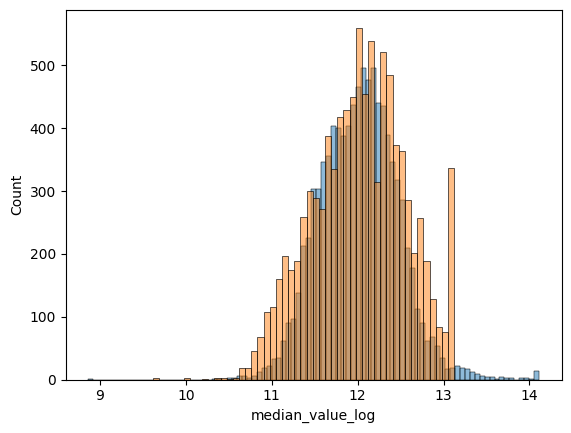

In [234]:
sns.histplot(X_train.dot(w_train), alpha=.5)
sns.histplot(y_train, alpha=.5)

In [243]:
def rmse(pred, y):
    res = 0.0
    for p, y in zip(pred, y):
        res += np.square(p-y)
    return np.round(np.sqrt(res), 7)

In [236]:
rmse(X_train.dot(w), y_train)

29.62

In [259]:
X_train.head()

,index,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bias
0,7735,33.93,-118.13,34.0,2122.0,517.0,1578.0,488.0,3.1496,1.0
1,7736,33.93,-118.13,19.0,1793.0,447.0,1222.0,452.0,2.6862,1.0
2,7737,33.94,-118.14,31.0,2841.0,774.0,1612.0,708.0,2.9205,1.0
3,7738,33.94,-118.14,35.0,2987.0,601.0,1561.0,606.0,4.0039,1.0
4,7739,33.94,-118.15,36.0,1948.0,341.0,992.0,363.0,4.2594,1.0


In [237]:
# 29.611579585007636 with mean
# 29.61893763142995 with 0
prep_X_0(X_val)
w_val = linear_reg(X_val, y_val)
pred_val = X_val.dot(w_val)
rmse(pred_val, y_val)

(3137, 10)
(10, 10)


16.49

In [238]:
# 16.49 is with 0 and mean
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [239]:
len(.01 * np.eye(X_val.shape[0]))

3137

In [253]:
prep_X_0(X_train)
prep_X_0(X_val)
for v in r:
    w_train = linear_reg(X_train, y_train, reg=v)
    pred_val = w_train[0] + X_val.dot(w_train[1:])
    print(v, rmse(pred_val, y_val))

    

0 90523.6583741
1e-06 90523.5872952
0.0001 90516.551834
0.001 90452.7083026
0.01 89825.4892397
0.1 84503.4984232
1 65201.8284773
5 55106.3779959
10 53240.046618


In [267]:
random_vals = np.arange(len(df))
test_len = int(np.round(len(random_vals)*test_pct))
val_len = int(np.round(len(random_vals)*val_pct))
rmse_list = []
for rs in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(rs)
    np.random.shuffle(random_vals)
    test_rows = random_vals[0:test_len]
    val_rows = random_vals[test_len:test_len+val_len]
    train_rows = random_vals[test_len+val_len:]
    
    test_df = df.iloc[test_rows]
    val_df = df.iloc[val_rows]
    train_df = df.iloc[train_rows]
    test_df.reset_index(inplace=True, drop=True)
    val_df.reset_index(inplace=True, drop=True)
    train_df.reset_index(inplace=True, drop=True)
    y_train = train_df["median_value_log"]
    X_train = train_df.drop(columns=["median_value_log", "median_house_value"])
    y_val = val_df["median_value_log"]
    X_val = val_df.drop(columns=["median_value_log", "median_house_value"])
    y_test = test_df["median_value_log"]
    X_test = test_df.drop(columns=["median_value_log", "median_house_value"])
    prep_X_0(X_train)
    prep_X_0(X_val)
    w_train = linear_reg(X_train, y_train)
    pred_val = w_train[0] + X_val.dot(w_train[1:])
    rmse_list.append(rmse(pred_val, y_val))
print (rmse_list)
np.std(rmse_list)


[4560.3235264, 4258.2501831, 4327.9396765, 4341.035287, 4022.6702162, 4239.4302759, 4709.4261056, 4131.7623122, 4590.064592, 4250.0867916]


204.09402462939073

In [272]:
random_vals = np.arange(len(df))
test_len = int(np.round(len(random_vals)*test_pct))
val_len = int(np.round(len(random_vals)*val_pct))
rmse_list = []
np.random.seed(9)
np.random.shuffle(random_vals)
test_rows = random_vals[0:test_len]
val_rows = random_vals[test_len:test_len+val_len]
train_rows = random_vals[test_len+val_len:]

test_df = df.iloc[test_rows]
val_df = df.iloc[val_rows]
train_df = df.iloc[train_rows]
test_df.reset_index(inplace=True, drop=True)
val_df.reset_index(inplace=True, drop=True)
train_df.reset_index(inplace=True, drop=True)
y_train = train_df["median_value_log"]
X_train = train_df.drop(columns=["median_value_log", "median_house_value"])
y_val = val_df["median_value_log"]
X_val = val_df.drop(columns=["median_value_log", "median_house_value"])
y_test = test_df["median_value_log"]
X_test = test_df.drop(columns=["median_value_log", "median_house_value"])

#combine X_train and X_val 
prep_X_0(X_train)
prep_X_0(X_val)
prep_X_0(X_test)
X_fulltrain = pd.concat([X_train, X_val])
y_fulltrain = pd.concat([y_train, y_val])
w_fulltrain = linear_reg(X_fulltrain, y_fulltrain, reg=.001)
pred_test = w_fulltrain[0] + X_test.dot(w_fulltrain[1:])
rmse_list.append(rmse(pred_test, y_fulltrain))
print (rmse_list)
np.std(rmse_list)


[4113.4129421]


0.0